## Import

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [121]:
preprocess_df = pd.read_csv('../data/preprocessing_data.csv')

## Feature Selection

In [122]:
X = preprocess_df.drop(columns = ['customer_id','location','payment_plan','payment_method','num_playlists_created','churned'])
y = preprocess_df['churned']

## Training set / Validation set / Test set

In [123]:
# 데이터를 70% 훈련 세트, 30% 임시 세트로 나누기
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# 임시 세트를 다시 50%로 나누어 15% 검증 세트, 15% 테스트 세트로 나누기
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## MLP Model

- 모델 정의

In [124]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

- 모델 컴파일

In [125]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy',  
              metrics=['accuracy'])

- 모델 학습

In [127]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

Epoch 1/50


2024-07-07 18:51:55.628226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2735/2735 [==============================] - ETA: 0s - loss: 0.8975 - accuracy: 0.7158

2024-07-07 18:52:08.171754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2735/2735 [==============================] - 14s 5ms/step - loss: 0.8975 - accuracy: 0.7158 - val_loss: 1.8187 - val_accuracy: 0.5990
Epoch 2/50
2735/2735 [==============================] - 14s 5ms/step - loss: 0.5758 - accuracy: 0.7692 - val_loss: 0.5057 - val_accuracy: 0.7777
Epoch 3/50
2735/2735 [==============================] - 13s 5ms/step - loss: 0.5129 - accuracy: 0.7803 - val_loss: 0.4118 - val_accuracy: 0.8064
Epoch 4/50
2735/2735 [==============================] - 14s 5ms/step - loss: 0.5161 - accuracy: 0.7788 - val_loss: 0.4141 - val_accuracy: 0.8042
Epoch 5/50
2735/2735 [==============================] - 13s 5ms/step - loss: 0.4783 - accuracy: 0.7847 - val_loss: 0.4339 - val_accuracy: 0.7948
Epoch 6/50
2735/2735 [==============================] - 13s 5ms/step - loss: 0.4630 - accuracy: 0.7872 - val_loss: 0.6919 - val_accuracy: 0.7151
Epoch 7/50
2735/2735 [==============================] - 14s 5ms/step - loss: 0.4453 - accuracy: 0.7921 - val_loss: 0.4023 - val_accuracy: 0.8

- 테스트 세트 평가

In [128]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

586/586 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8300
Test Accuracy: 0.8300266861915588


- 예측

In [129]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

2024-07-07 19:02:56.605757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


- 성능 평가

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("AUC: {:.4f}".format(roc_auc))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

AUC: 0.9163
Precision: 0.8326
Recall: 0.8369
F1 Score: 0.8347

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      9132
           1       0.83      0.84      0.83      9618

    accuracy                           0.83     18750
   macro avg       0.83      0.83      0.83     18750
weighted avg       0.83      0.83      0.83     18750



- Confusion Matrix 시각화

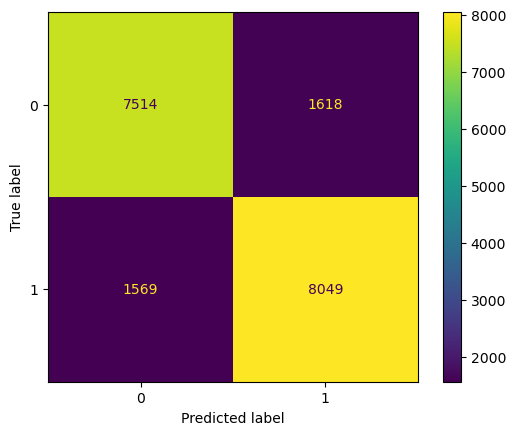

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

- ROC Curve 시각화

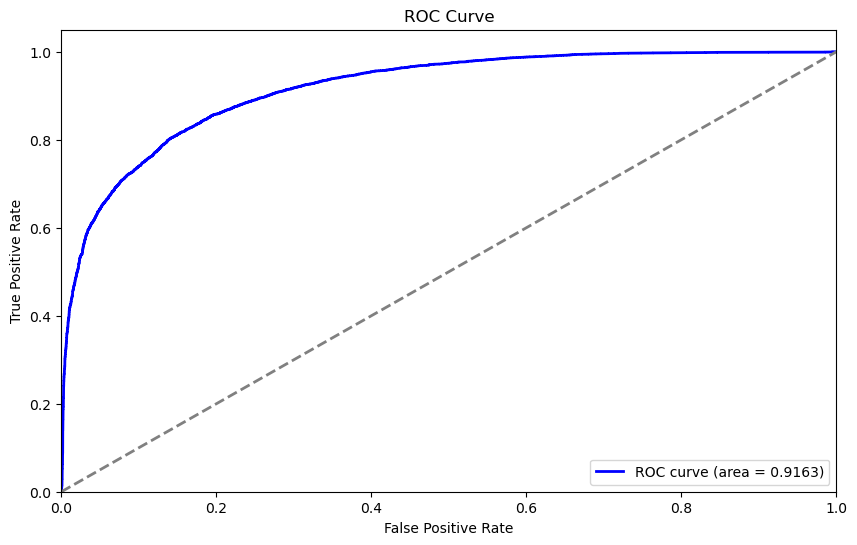

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()